In [1]:
import numpy as np
import sys
import math 
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
'''
    batch_perceptron(X,Y,w)
    
        function that applies batch algorithm
        
        ...
        
        Parameters:
        -----------
        X: numpy array
           array of features
        Y:numpy array
           labels array
        w: array of random generated weights  
        
        Returns:
        --------
        w: array
            last updated value of weight
        w_update: array 
            containing all updated versions of the weight
        epoch: int
            number of interations through the dataset (how many times the algorithm passes through the entire dataset)
        norm_delta: array
            array containing the updated values of delta

'''


def batch_perceptron ( X , Y,w):
    n = X.shape[1]
    alpha=1                                #learning rate (default=1)
    e = sys.float_info.epsilon
    norm_delta=[]
    epoch=0                              # no. of iterations (Complete passes)
    delta = np.ones(n)
    w_update = [ ]                      # array containing the updated value of W
    
    
    while ( norm(delta,1) > e):         #checking if delta reached zero or not, if true then no new value of W will be calcualated
        delta = np.zeros(n)
        
        for i in range(len(X)):
            
            if Y[i] * (w.dot(X[i])) <= 0:     
                
                delta = delta - ( Y[i] * X[i] )
            
        delta = delta/len(X)
        norm_delta.append(norm(delta,1))      # get norm of delta and add them to a new array
        epoch=epoch +1                         # No. of Complete passes through dataset 
        w = w - (alpha * delta)                 # update value of w and add it to w_update
        w_update.append(w)
            
    return w ,  w_update, epoch, norm_delta

In [3]:
'''
    batch_perceptron(X,Y,w)
    
        function that applies Online algorithm
        
        ...
        
        Parameters:
        -----------
        X: numpy array
           array of features
        Y:numpy array
           labels array
        w: array of random generated weights  
        
        Returns:
        --------
        w: array
            last updated value of weight
       online_w_steps: array 
            containing all updated versions of the weight
       online_epoch: int
            number of interations through the dataset (how many times the algorithm passes through the entire dataset)
       online_norm_delta: array
            array containing the updated values of delta

'''

def online_batch_perceptron ( X , Y ,w):
    
    online_n = X.shape[1]
    alpha=1 
    online_data_length = len(X)
    online_e = sys.float_info.epsilon
    online_delta = np.ones(online_n)
    online_w_steps = [ ]
    online_norm_delta=[] 
    online_epoch=0
    
    while ( norm(online_delta,1) > online_e):
        
        online_delta = np.zeros(online_n)
        
        for i in range(len(X)): 
       
            if Y[i] * (w.dot(X[i])) <= 0:
                
                online_delta = online_delta - ( Y[i] * X[i] )
                online_delta = online_delta/online_data_length
                  
                w = w - (alpha * online_delta)       # weights value are updated in each iteration
                online_w_steps.append(w)
                
                      
        online_norm_delta.append(norm(online_delta,1))         
        online_epoch=online_epoch+1
        
    return w ,  online_w_steps, online_epoch, online_norm_delta

In [4]:
# Question no. 1 Inputs

X = np.array([[50 , 55 , 70 , 80 , 130 , 150 , 155 , 160],
               [1 , 1 , 1 , 1 , 1 , 1 , 1 , 1]]).T
Y = np.array([1 , 1 , 1 , 1 , -1, -1 , -1 , -1])


In [5]:
# Question no.  4 Inputs

X= np.array([[0,255,0,0,255,0,255,255],
             [0,0,255,0,255,255,0,255],
             [0,0,0,255,0,255,255,255], 
             [1,1,1,1,1,1,1,1]]).T

Y = np.array([1,1,1,-1,1,-1,-1,1])

In [6]:
sign = lambda x: math.copysign(1,x)

In [7]:
N = X.shape[1]
Weight = np.random.uniform(-1, 1, N)             # Random weights that ranges from -1 to 1

In [8]:
w ,  w_update , epoch, norm_delta  = batch_perceptron( X , Y , Weight)

0.31621736319609717
78.40850176759973
32.75555605006381
186.72673537089236
110.84784045446744
219.16607405776008
264.81901977529594
297.25835846216364
-0.05878263680390283
-8050.0914982324
-8095.744443949937
-24198.023264629108
-16145.777159545534
-32293.70892594224
-32248.055980224704
-40343.74164153784
0.5662173631960972
16334.908501767599
16289.255556050062
-16069.273264629108
32623.59784045447
219.41607405775974
265.0690197752963
16553.758358462164
0.31621736319609717
8206.533501767599
8160.880556050063
-32325.773264629108
16367.097840454466
-24165.20892594224
-24119.555980224704
-15958.99164153784
0.44121736319609717
16334.783501767599
16289.130556050062
-24197.523264629108
32623.47284045447
-7908.833925942242
-7863.180980224705
8425.508358462163


In [9]:
print(w)

[ 64.05624425  63.87721309 -94.89397836   0.44121736]


In [10]:
Online_w ,  Online_w_update , Online_epoch, Online_norm_delta  = online_batch_perceptron( X , Y, Weight )

In [11]:
#Batch Algorithm
print('Value of W after all iterations: ',w)                        # Random values of w after all iterations
print('No. of times weights are updated: ', len(w_update))          # no. of times the algorithm updates the weights
print('No. of times delta value is updated: ', len(norm_delta))   # no. of times the algorithm updates the deltas
print('Total No. of iterations (epoch) : ', epoch)


Value of W after all iterations:  [ 64.05624425  63.87721309 -94.89397836   0.44121736]
No. of times weights are updated:  5
No. of times delta value is updated:  5
Total No. of iterations (epoch) :  5


In [12]:
#Online training
print('Value of W after all iterations: ',Online_w)                        # Random values of w after all iterations
print('No. of times weights are updated: ', len(Online_w_update))          # no. of times the algorithm updates the weights
print('No. of times delta value is updated: ', len(Online_norm_delta))   # no. of times the algorithm updates the deltas
print('Total No. of iterations (epoch) : ', Online_epoch)


Value of W after all iterations:  [ 56.08749425  51.42604122 -87.42327524   0.09551424]
No. of times weights are updated:  13
No. of times delta value is updated:  8
Total No. of iterations (epoch) :  8


In [13]:
for x in X:
    print( sign( w.dot(x) ) )

1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0


In [14]:
for x in X:
    print( sign( Online_w.dot(x) ) )

1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0


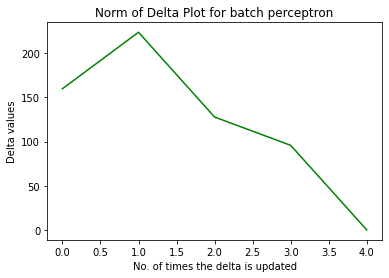

In [15]:
 # plotting final norm delta values for Batch algorithm
plt.plot(norm_delta,'g')           
plt.title('Norm of Delta Plot for batch perceptron')
plt.xlabel('No. of times the delta is updated')
plt.ylabel('Delta values')
plt.show()

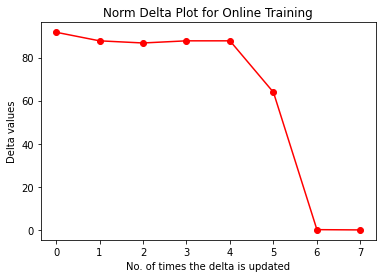

In [16]:
 # plotting final norm delta values for Online algorithm
plt.plot(Online_norm_delta,'or-')            
plt.title('Norm Delta Plot for Online Training')
plt.xlabel('No. of times the delta is updated')
plt.ylabel('Delta values')
plt.show()